## DATA CLEANING PROJECT

This project focuses on cleaning and preparing a raw dataset for accurate analysis and database integration. The dataset contained various quality issues, including irrelevant columns, incorrect data types, ambiguous headings, duplicates, missing values, and inconsistent inputs.

The objective was to systematically address these issues, extract relevant information, and structure the data for both analysis and storage in a MySQL database. The cleaned dataset now serves as a reliable foundation for deriving insights and supporting data-driven decision-making

In [ ]:
import pandas as pd
import numpy as np
import re

zomato_original = pd.read_csv(r"C:\Users\MICHAEL KODUA BOAMAH\Desktop\Zomato_data_cleaning\Dataset\Raw_dataset.csv")

df = zomato_original.copy()

Before initiating the cleaning process, the dataset was examined to understand its structure, content, and potential quality issues. This involved reviewing column names, data types, value ranges, sample records, and overall completeness to identify areas requiring preprocessing and transformation

In [2]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

This section details the process of transforming the raw dataset into a clean, structured, and analysis-ready format. The cleaning tasks addressed issues such as irrelevant columns, incorrect data types, ambiguous column headings, duplicates, missing values, and inconsistent inputs. Additional steps included extracting relevant information from the “Review List" column

To ensure the dataset is clean and consistent, each column will be reviewed and cleaned individually. This process will address inconsistencies, improve usability, and prepare the data for reliable analytical work

After review, I will be dropping columns: url, phone and menu_item for now

In [11]:
df.drop(columns=["url", "phone", "menu_item"], inplace=True)
df.columns.tolist()

['address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'listed_in(type)',
 'listed_in(city)']

In [12]:
df.rename(columns={
    "rate": 'table_booking_rating',
    "name": "restaurant_name",
    "approx_cost(for two people)" : "approx_cost_for_two",
    "listed_in(type)" : "service_type",
    "listed_in(city)" : "listed_city"
}, inplace=True)

In [13]:
df.columns = df.columns.str.capitalize()
df.columns

Index(['Address', 'Restaurant_name', 'Online_order', 'Book_table',
       'Table_booking_rating', 'Votes', 'Location', 'Rest_type', 'Dish_liked',
       'Cuisines', 'Approx_cost_for_two', 'Reviews_list', 'Service_type',
       'Listed_city'],
      dtype='object')

In [15]:
df.duplicated().sum()

np.int64(50)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.isnull().sum()

Address                     0
Restaurant_name             0
Online_order                0
Book_table                  0
Table_booking_rating     7765
Votes                       0
Location                   21
Rest_type                 227
Dish_liked              28041
Cuisines                   45
Approx_cost_for_two       345
Reviews_list                0
Service_type                0
Listed_city                 0
dtype: int64

In [18]:
df.dtypes

Address                 object
Restaurant_name         object
Online_order            object
Book_table              object
Table_booking_rating    object
Votes                    int64
Location                object
Rest_type               object
Dish_liked              object
Cuisines                object
Approx_cost_for_two     object
Reviews_list            object
Service_type            object
Listed_city             object
dtype: object

In [19]:
df['Table_booking_rating'] = df["Table_booking_rating"].astype(str).str.extract(r"(\d+\.\d+|\d+)").astype(float)

In [20]:
df["Approx_cost_for_two"] = pd.to_numeric(
    df["Approx_cost_for_two"].str.replace(",", "", regex=False), 
    errors="coerce"
).astype("Int64")

In [21]:
df['Reviews_list'] = df['Reviews_list'].astype(str).str.extract(r'Rated\s*([\d.]+)').astype(float)

In [22]:
df.head(2)

,Address,Restaurant_name,Online_order,Book_table,Table_booking_rating,Votes,Location,Rest_type,Dish_liked,Cuisines,Approx_cost_for_two,Reviews_list,Service_type,Listed_city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,4.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,4.0,Buffet,Banashankari


In [23]:
df.rename(columns={
    "Table_booking_rating": 'Book_table_rating',
    "Reviews_list" : "Experience_rating"
}, inplace=True)

In [24]:
df.dtypes

Address                 object
Restaurant_name         object
Online_order            object
Book_table              object
Book_table_rating      float64
Votes                    int64
Location                object
Rest_type               object
Dish_liked              object
Cuisines                object
Approx_cost_for_two      Int64
Experience_rating      float64
Service_type            object
Listed_city             object
dtype: object

In [25]:
df.isna().sum()

Address                    0
Restaurant_name            0
Online_order               0
Book_table                 0
Book_table_rating      10033
Votes                      0
Location                  21
Rest_type                227
Dish_liked             28041
Cuisines                  45
Approx_cost_for_two      345
Experience_rating       7585
Service_type               0
Listed_city                0
dtype: int64

I will use the Missingno library to visualize the distribution of missing values across the dataset, providing a clear overview of data completeness and helping to identify columns that require cleaning

<Axes: >

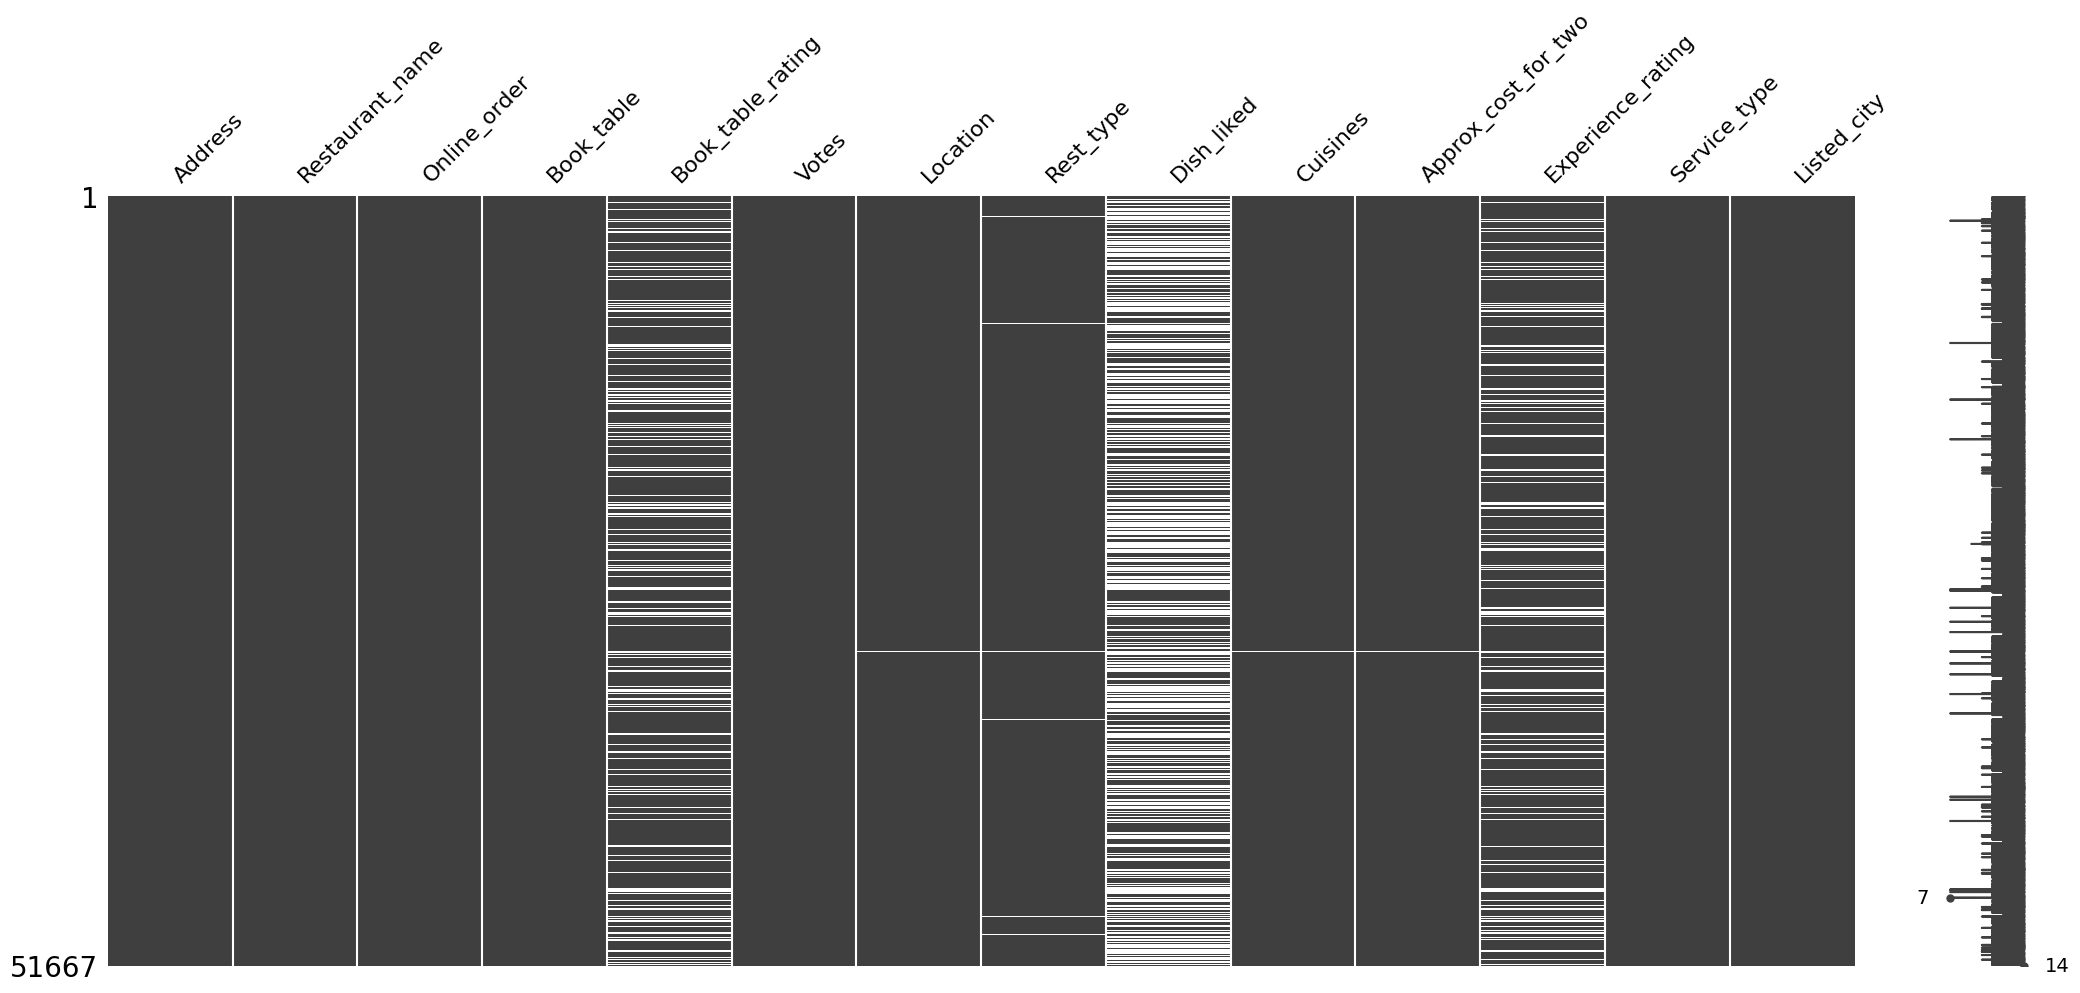

In [26]:
import missingno as msno
msno.matrix(df)

Although the Dish_liked column contains a high proportion of missing values, it will still be included in the investigation to assess whether the blanks have any relationship with other variables, such as Service_rating. Understanding these patterns could provide valuable insights for formulating targeted recommendations and strategies

In [27]:
df["Dish_liked_input"] = df['Dish_liked'].isna()

In [28]:
df["Dish_liked"] = df["Dish_liked"].fillna("Not Provided")

In [29]:
cols = list(df.columns)

print(cols)

['Address', 'Restaurant_name', 'Online_order', 'Book_table', 'Book_table_rating', 'Votes', 'Location', 'Rest_type', 'Dish_liked', 'Cuisines', 'Approx_cost_for_two', 'Experience_rating', 'Service_type', 'Listed_city', 'Dish_liked_input']


In [30]:
dish_index = cols.index("Dish_liked")

In [31]:
cols.remove("Dish_liked_input")

In [32]:
cols.insert(dish_index + 1, "Dish_liked_input")

In [33]:
df = df[cols]

In [34]:
df.head(2)

,Address,Restaurant_name,Online_order,Book_table,Book_table_rating,Votes,Location,Rest_type,Dish_liked,Dish_liked_input,Cuisines,Approx_cost_for_two,Experience_rating,Service_type,Listed_city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",False,"North Indian, Mughlai, Chinese",800,4.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",False,"Chinese, North Indian, Thai",800,4.0,Buffet,Banashankari


Examining the distribution of Book_table_rating to determine the most appropriate method for handling its missing values.

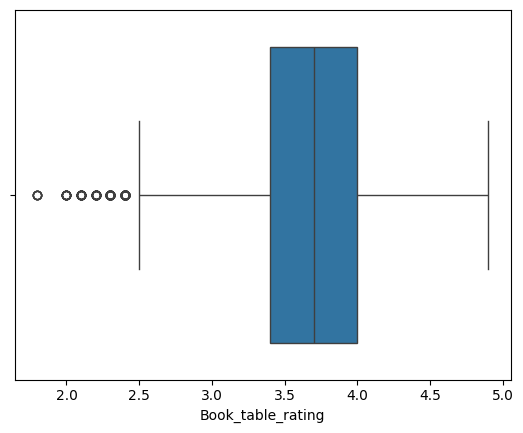

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Book_table_rating"])
plt.show()

In [36]:
print("Mean:", df["Book_table_rating"].mean())
print("Median:", df["Book_table_rating"].median())

Mean: 3.7004659653168086
Median: 3.7


After calculating the mean and median, and analyzing the data distribution using a box plot, I have chosen to impute the missing values in the Table_booking_rating column with the median. This approach was selected despite the presence of a few outliers, as the median provides a more robust measure of central tendency less affected by these extreme values

In [37]:
df["Book_table_rating"] = df["Book_table_rating"].fillna(df["Book_table_rating"].median())

Examining the distribution of Experience_rating to determine the most appropriate method for handling its missing values.

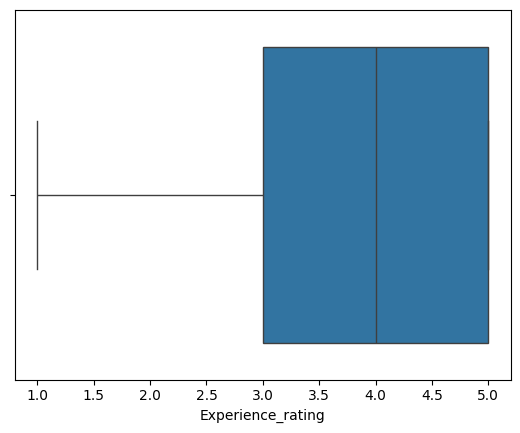

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Experience_rating"])
plt.show()

In [39]:
print("Mean:", df["Experience_rating"].mean())
print("Median:", df["Experience_rating"].median())

Mean: 3.525758813121002
Median: 4.0


Following the calculation of the mean and median, along with an analysis of the data distribution through a box plot, the missing values in the Experience_rating column were imputed using the median. This method was chosen because the median offers a more robust measure of central tendency, minimizing the impact of the few outliers present in the data

In [40]:
df["Experience_rating"] = df["Experience_rating"].fillna(df["Experience_rating"].median())

<Axes: >

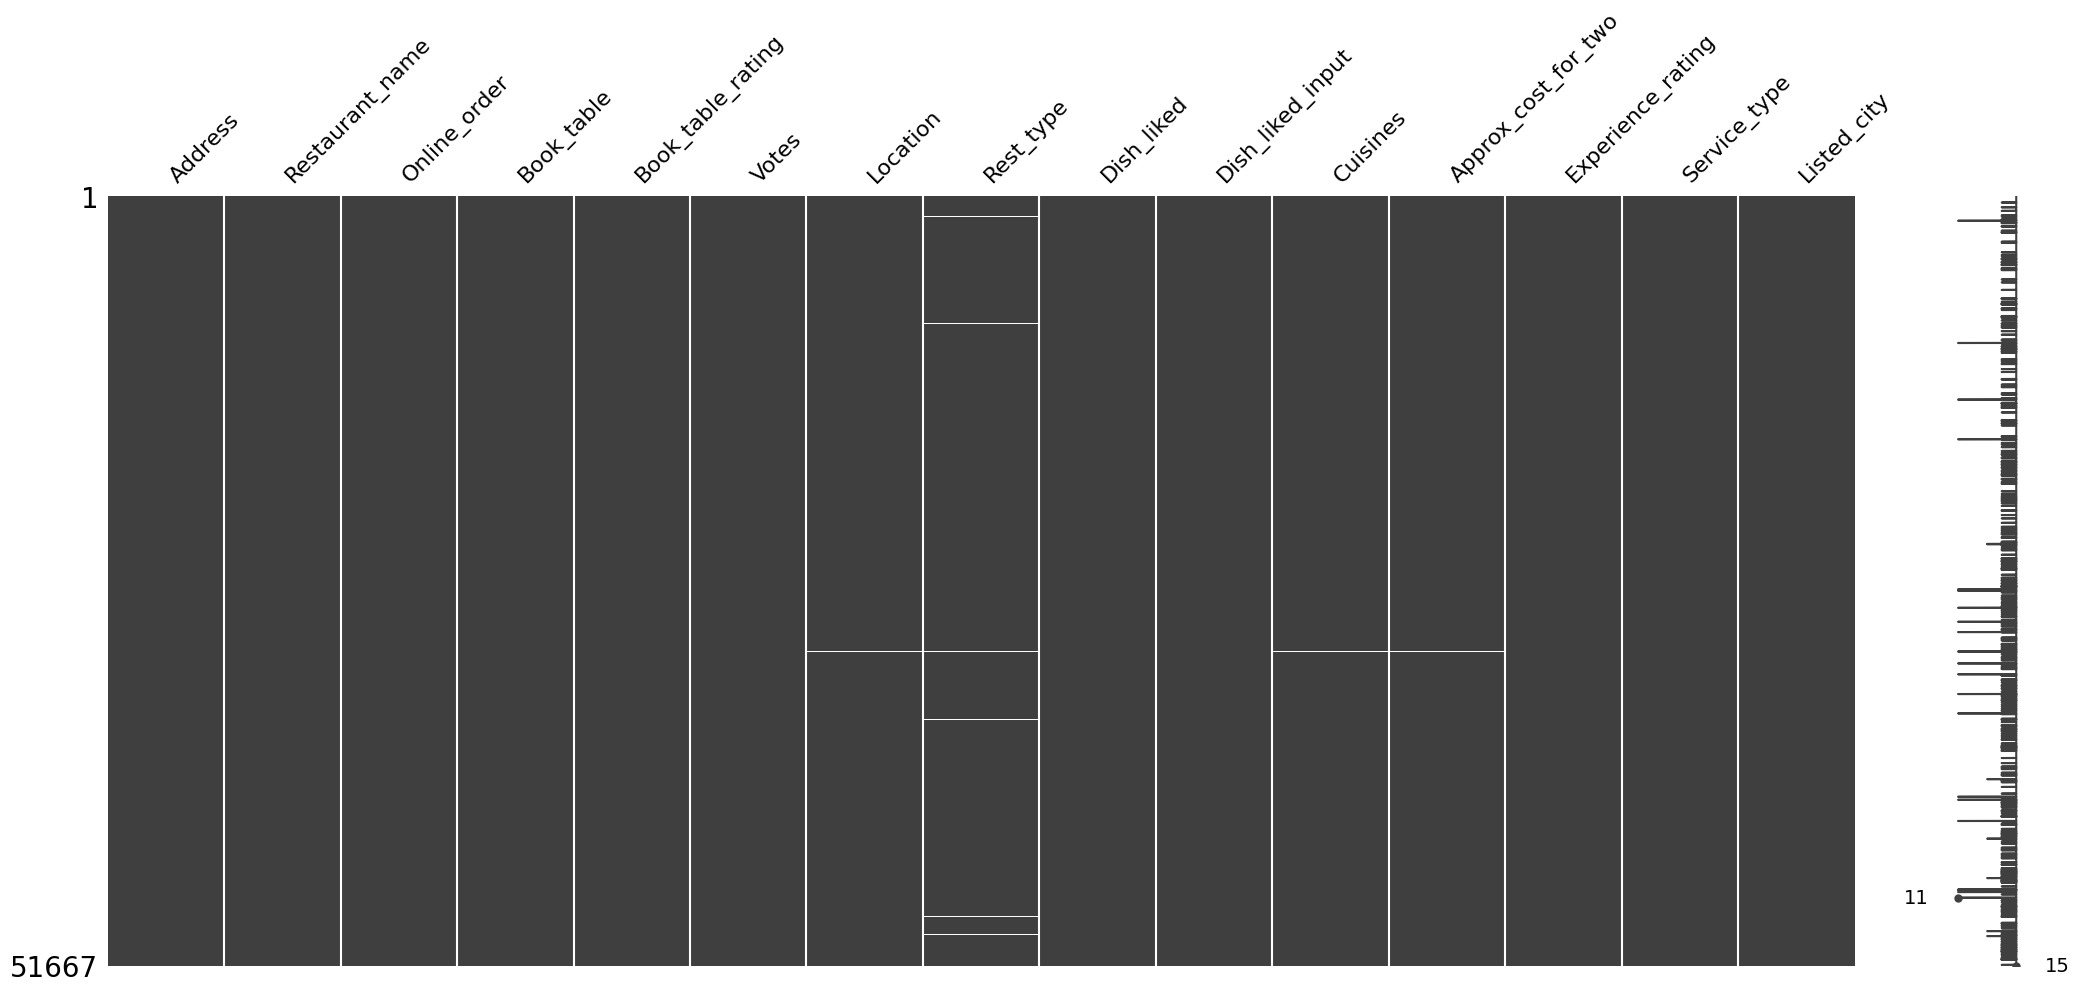

In [41]:
import missingno as msno
msno.matrix(df)

I will now proceed to impute the missing values for column "Approx_cost_for_two" and "Rest_type" and droped NA for columns: "Location" and "Cuisines" to ensure completeness of the dataset.

In [42]:
df.isna().sum()

Address                  0
Restaurant_name          0
Online_order             0
Book_table               0
Book_table_rating        0
Votes                    0
Location                21
Rest_type              227
Dish_liked               0
Dish_liked_input         0
Cuisines                45
Approx_cost_for_two    345
Experience_rating        0
Service_type             0
Listed_city              0
dtype: int64

In [43]:
df.head(2)

,Address,Restaurant_name,Online_order,Book_table,Book_table_rating,Votes,Location,Rest_type,Dish_liked,Dish_liked_input,Cuisines,Approx_cost_for_two,Experience_rating,Service_type,Listed_city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",False,"North Indian, Mughlai, Chinese",800,4.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",False,"Chinese, North Indian, Thai",800,4.0,Buffet,Banashankari


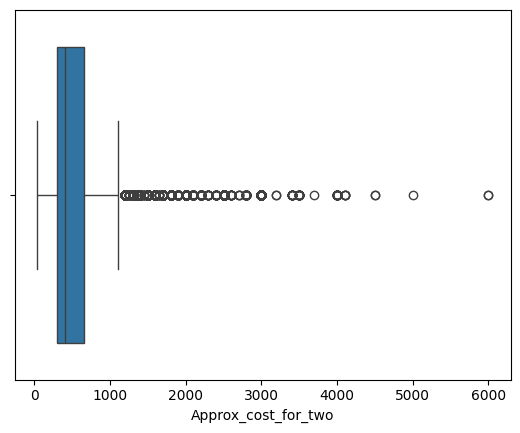

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Approx_cost_for_two"])
plt.show()

In [45]:
print("Mean:", df["Approx_cost_for_two"].mean())
print("Median:", df["Approx_cost_for_two"].median())

Mean: 555.4640310198356
Median: 400.0


The median value was employed to fill NA values of column "Approx_cost_for_two"

In [46]:
df["Approx_cost_for_two"] = df["Approx_cost_for_two"].fillna(df["Approx_cost_for_two"].median())

In [47]:
df.dropna(subset=["Location", "Cuisines"], inplace=True)

In [48]:
df["Rest_type"] = df["Rest_type"].fillna("Unknown")

In [49]:
df.duplicated().sum()

np.int64(35)

In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df.nunique()

Address                11480
Restaurant_name         8785
Online_order               2
Book_table                 2
Book_table_rating         31
Votes                   2328
Location                  93
Rest_type                 94
Dish_liked              5272
Dish_liked_input           2
Cuisines                2723
Approx_cost_for_two       70
Experience_rating          9
Service_type               7
Listed_city               30
dtype: int64

To facilitate detailed analysis, the dataset was transformed by exploding the multi-valued columns Rest_type, Dish_liked, and Cuisines. This process involved splitting entries containing multiple values into separate rows in a new jupyter notebooks, allowing for granular examination of each individual category or item. Exploding these columns improves data normalization and enables more precise aggregation and insights across these key attributes

This was achieved by leveraging the Pandas row index to maintain data integrity, preserving these indices in the exported dataset to serve as unique keys for subsequent database integration

The fully processed dataset was exported for use in dedicated Jupyter Notebooks, facilitating modular analysis and a streamlined workflow.

This export enables focused transformation (exploding specific columns) in separate notebooks tailored to individual columns. Such a modular approach enhances flexibility and improves organization throughout the data processing pipeline

In [ ]:
df.to_csv("Cleaned_dataset.csv", index=True)

The final processed dataset represents the cleaned, transformed, and fully prepared data ready for analysis and database integration.
Columns to be exploxed were dropped from this final processed dataset

In [53]:
df.drop(["Rest_type","Dish_liked","Cuisines"], axis=1, inplace=True)

In [54]:
df.head(2)

,Address,Restaurant_name,Online_order,Book_table,Book_table_rating,Votes,Location,Dish_liked_input,Approx_cost_for_two,Experience_rating,Service_type,Listed_city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,False,800,4.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,False,800,4.0,Buffet,Banashankari


In [ ]:
df.to_csv("Final_main_dataset.csv", index=True)